In [ ]:
##VERİ YÜKLEME VE TANIMA

import pandas as pd

dosya_adi = "diabetes.csv"
df = pd.read_csv(dosya_adi)

print("İlk 10 veri: \n",df.head(10))
print("Toplam veri sayısı: ",df.shape)
print("Temel İstatistikler(max,min...): \n",df.describe())
target_column = 'Outcome'
print("\nHasta Sayıları: \n",df[target_column].value_counts())

İlk 10 veri: 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3               

In [ ]:
## VERİ HAZIRLIĞI

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

hedef_sutun_adi = 'Outcome'

X = df.drop(hedef_sutun_adi, axis=1)
y = df[hedef_sutun_adi]

print("Özellikler (X) ilk 10 satır:")
print(X.head(10))
print("\nHedef Değişken (y) ilk 10 satır:")
print(y.head(10))
print("\nX'in şekli:", X.shape)
print("y'nin şekli:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
print("\nX_train şekli:", X_train.shape)
print("X_test şekli:", X_test.shape)
print("y_train şekli:", y_train.shape)
print("y_test şekli:", y_test.shape)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Özellikler (X) ilk 10 satır:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4  

Lojistik Regresyon ilk 10 tahmin:  [0 0 0 0 0 0 0 1 0 0]
Modelin Doğruluk Skoru: 0.7273

Confusion Matrix:
  TN FP
[[90  9]
 [33 22]]
  FN TP


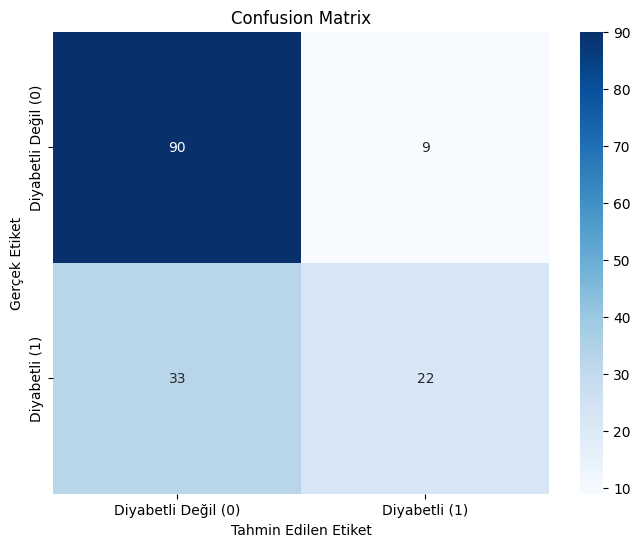

In [ ]:
## MODEL KURULUMU : Lojistik Regresyon
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(C=0.01,solver='liblinear', penalty='l2',random_state=12, max_iter=1000)
model = log_reg_model
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

y_pred_lr = log_reg_model.predict(X_test)
print("Lojistik Regresyon ilk 10 tahmin: ",y_pred_lr[:10])
y_pred = log_reg_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin Doğruluk Skoru: {accuracy:.4f}")
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print("  TN FP")
print(cm)
print("  FN TP")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Diyabetli Değil (0)', 'Diyabetli (1)'], yticklabels=['Diyabetli Değil (0)', 'Diyabetli (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

KNN ilk 10 tahmin: [0 0 0 0 0 0 0 0 1 1]
Modelin Doğruluk Skoru: 0.7532

Confusion Matrix:
  TN FP
[[85 14]
 [24 31]]
  FN TP


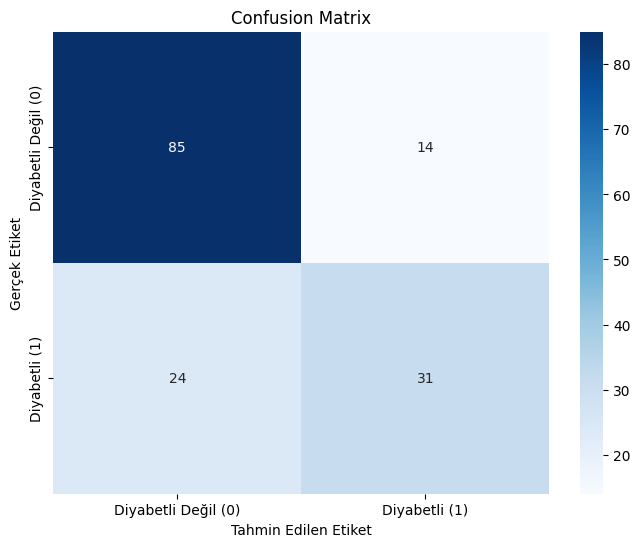

In [ ]:
## MODEL KURULUMU : KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=19)
model=knn_model
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

y_pred_knn = knn_model.predict(X_test)
print("KNN ilk 10 tahmin:", y_pred_knn[:10])
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin Doğruluk Skoru: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print("  TN FP")
print(cm)
print("  FN TP")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Diyabetli Değil (0)', 'Diyabetli (1)'], yticklabels=['Diyabetli Değil (0)', 'Diyabetli (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

Karar Ağaçları ilk 10 tahmin: [0 0 0 0 0 0 0 1 1 1]
Modelin Doğruluk Skoru: 0.7922

Confusion Matrix:
  TN FP
[[87 12]
 [20 35]]
  FN TP


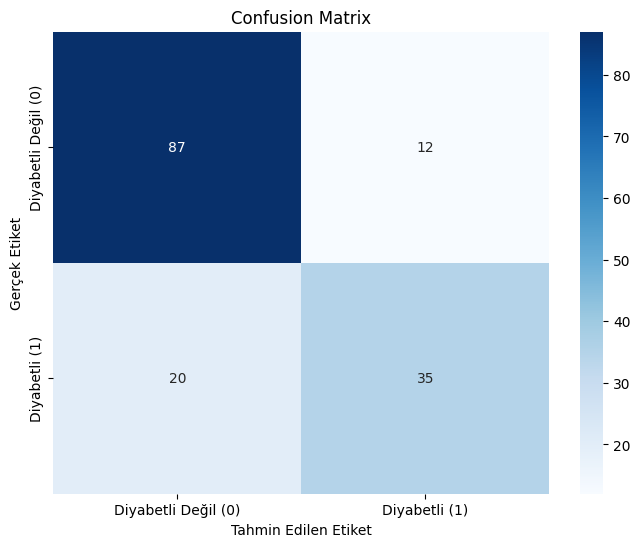

In [ ]:
## MODEL KURULUMU : Karar Ağaçları
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
model=dt_model
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

y_pred_dt = dt_model.predict(X_test)
print("Karar Ağaçları ilk 10 tahmin:", y_pred_dt[:10])
y_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin Doğruluk Skoru: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print("  TN FP")
print(cm)
print("  FN TP")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Diyabetli Değil (0)', 'Diyabetli (1)'], yticklabels=['Diyabetli Değil (0)', 'Diyabetli (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()